# E-commerce streamlit

In [1]:
project_title="E-commerce streamlit"

# 1 system setup(defineer het probleem)

!OPDRACHT UITLEG!

**Credits :**   
 
----
-https://www.kaggle.com/datasets/prachi13/customer-analytics        
-https://www.youtube.com/watch?v=gkEbaMgvLs8&ab_channel=DecisionForest          
-https://daniellewisdl-streamlit-cheat-sheet-app-ytm9sg.streamlitapp.com/   
-https://emojiterra.com/


Setup packages required for analysis


In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import streamlit as st
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as py 
from PIL import Image

In [3]:
!kaggle datasets download prachi13/customer-analytics -f Train.csv

Train.csv: Skipping, found more recently modified local copy (use --force to force download)


# 2 Import data

In [4]:
train = pd.read_csv('Train.csv')
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
train.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


- Er zijn totaal 891 rijen
- Leeftijd, cabin en embarked zijn dus lege rijen.
- Om de missende waardes te vullen gaan we de data manipuleren en creeeren we dus een copy:

In [6]:
df_train = train.copy()

Vervolgens kunnen wij de lege waardes visueel maken met een heatmap:

<AxesSubplot:>

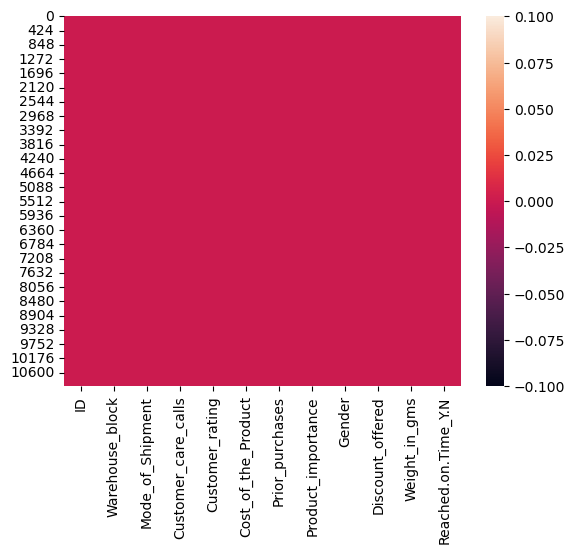

In [7]:
sns.heatmap(df_train.isnull())

Wat valt op:
* 'Age' mist een aantal values
* 'Cabin' is vrijwel leeg


In [8]:
df_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
df_train['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

# 3 Exploratory Data Analysis

## 3.1 kolommen splitsen / verwijderen / hernoemen / vullen

In [10]:
df_train.rename(columns={"Reached.on.Time_Y.N":"Arrival_Time"},inplace=True)

In [11]:
df_train["Warehouse_block"].replace({"F": "E"}, inplace=True)


**Resultaat(Export file aanmaken om app mee te maken)** 

In [12]:
df_train.to_csv('data_app.csv', index=False)